# result_data_adult_R_bite_transmission_time_summary

## total

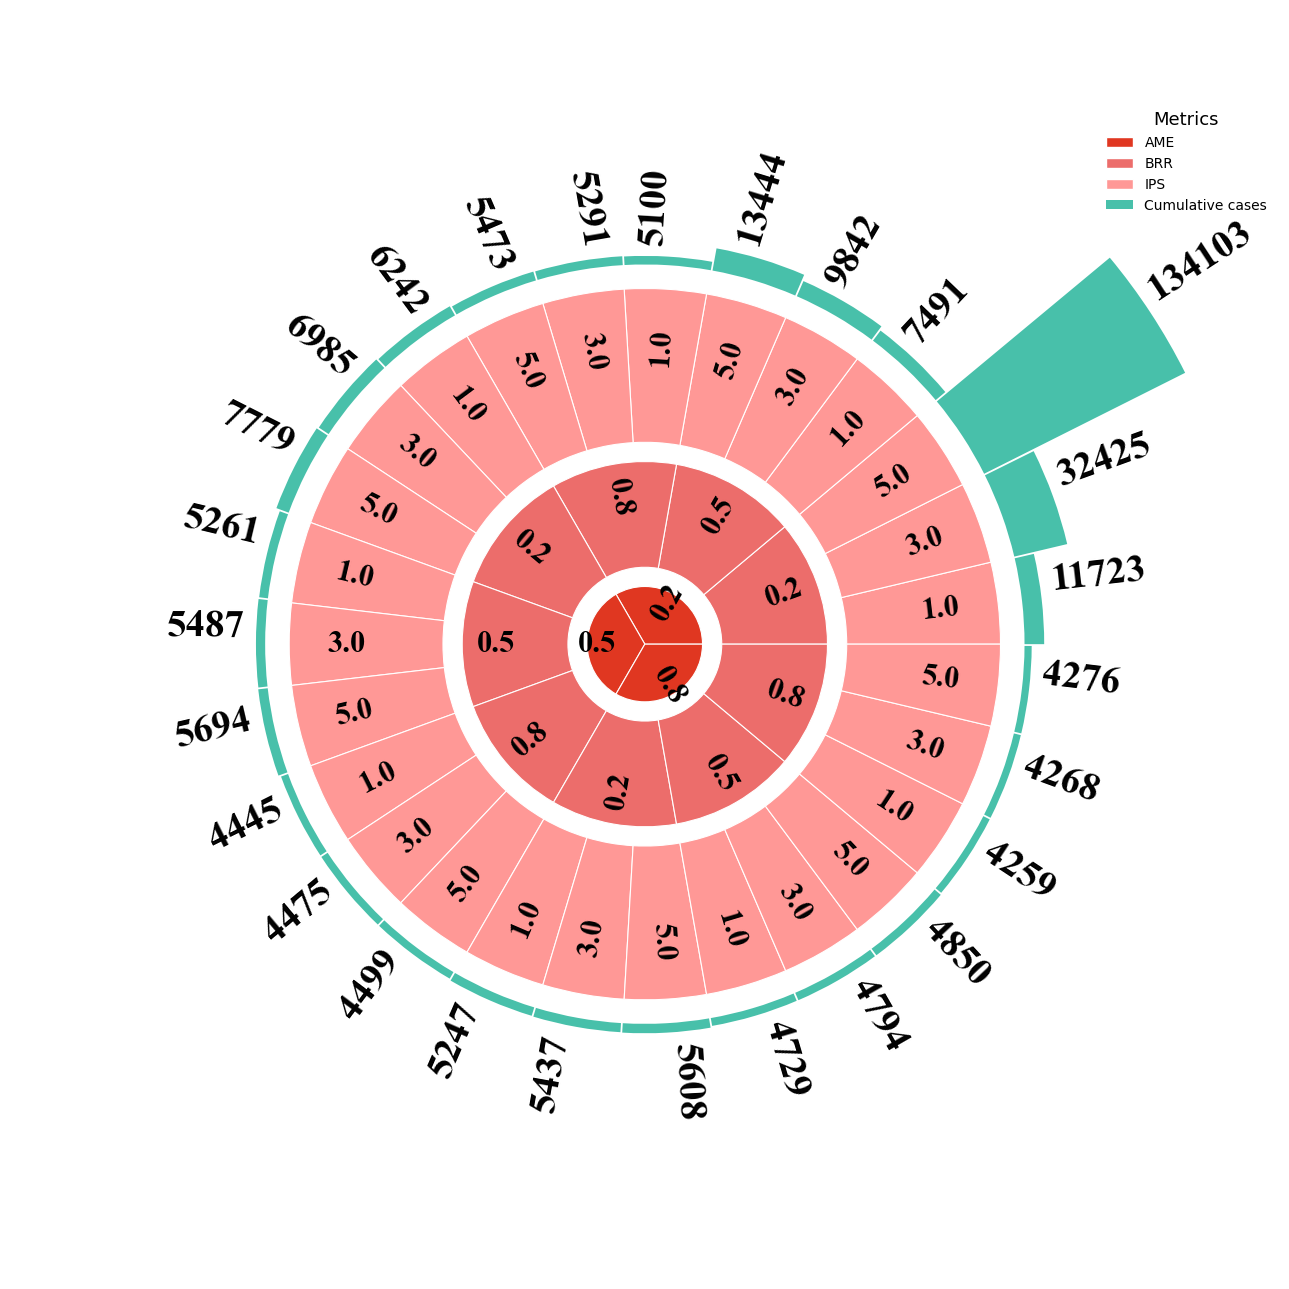

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import matplotlib as mpl 
import os

mpl.rcParams['pdf.fonttype'] = 42

# Color palette
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")

excel_file_path = os.path.join(result_dir, "result_data_adult_R_bite_transmission_time_summary.xlsx")

df = pd.read_excel(excel_file_path)
df = df[['um_c', 'R_bite', 'transmission_time', 'total_cases_mid']]
df.rename(columns={
        'um_c': 'AME',
        'R_bite': 'BRR',
        'transmission_time': 'IPS',
        'total_cases_mid': 'Cumulative cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1  
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False) 

# Ring layout parameters
base_thickness = 0.8  
incr = 0.5  
gap_thickness = 0.2  

ring_thickness = [base_thickness + i*incr for i in range(n_inner)]  
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]  
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)] 
total_inner_radius = sum(ring_thickness) 

fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(13,13))  

def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

for j, col in enumerate(cols[:-1]): 
    values = np.array(df[col].values) 

    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))  
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Find consecutive identical values (use np.isclose to avoid floating-point precision errors)
    # Initialize lists to store each unique value and its start position
    unique_vals = []
    starts = []
    prev = None  # Store previous value for comparison
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0): 
            unique_vals.append(v)
            starts.append(i)
            prev = v        
    starts.append(len(values))   # Ensure last segment closes properly

    # Calculate each sector's angular width based on count of consecutive identical values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add text label (numeric value) at the center of each sector
        r_center = bottom + thickness/2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22, family='Times New Roman', weight='bold')

# ---------- Display indicator names between rings (only once per ring; mainly to reserve space for post-annotation) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Position label at top (can change to other angle, e.g., 0.5*np.pi)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)
    
# ---------- Outer ring: radial bar chart (representing the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6  
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi/n_rows * 0.98
theta_center = theta_rows + bar_width/2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03*total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner rings correspond to indicator metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer ring (bar chart) legend
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to the plot
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=10, title_fontsize=13)

# ---------- Beautify the chart ----------
ax.set_yticklabels([])   # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove outer circular frame
ax.set_xticks([])  # Hide angular ticks
ax.yaxis.grid(False)  # Hide inner circle grid lines
# ax.set_title("Eliminating adult mosquitoes & Reducing mosquito bite rates & Shortening transmission time", 
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)
plt.tight_layout()
plt.savefig(os.path.join(result_dir,"plot fig/Fig.5 d.png"), format="png", dpi=450)
plt.show()


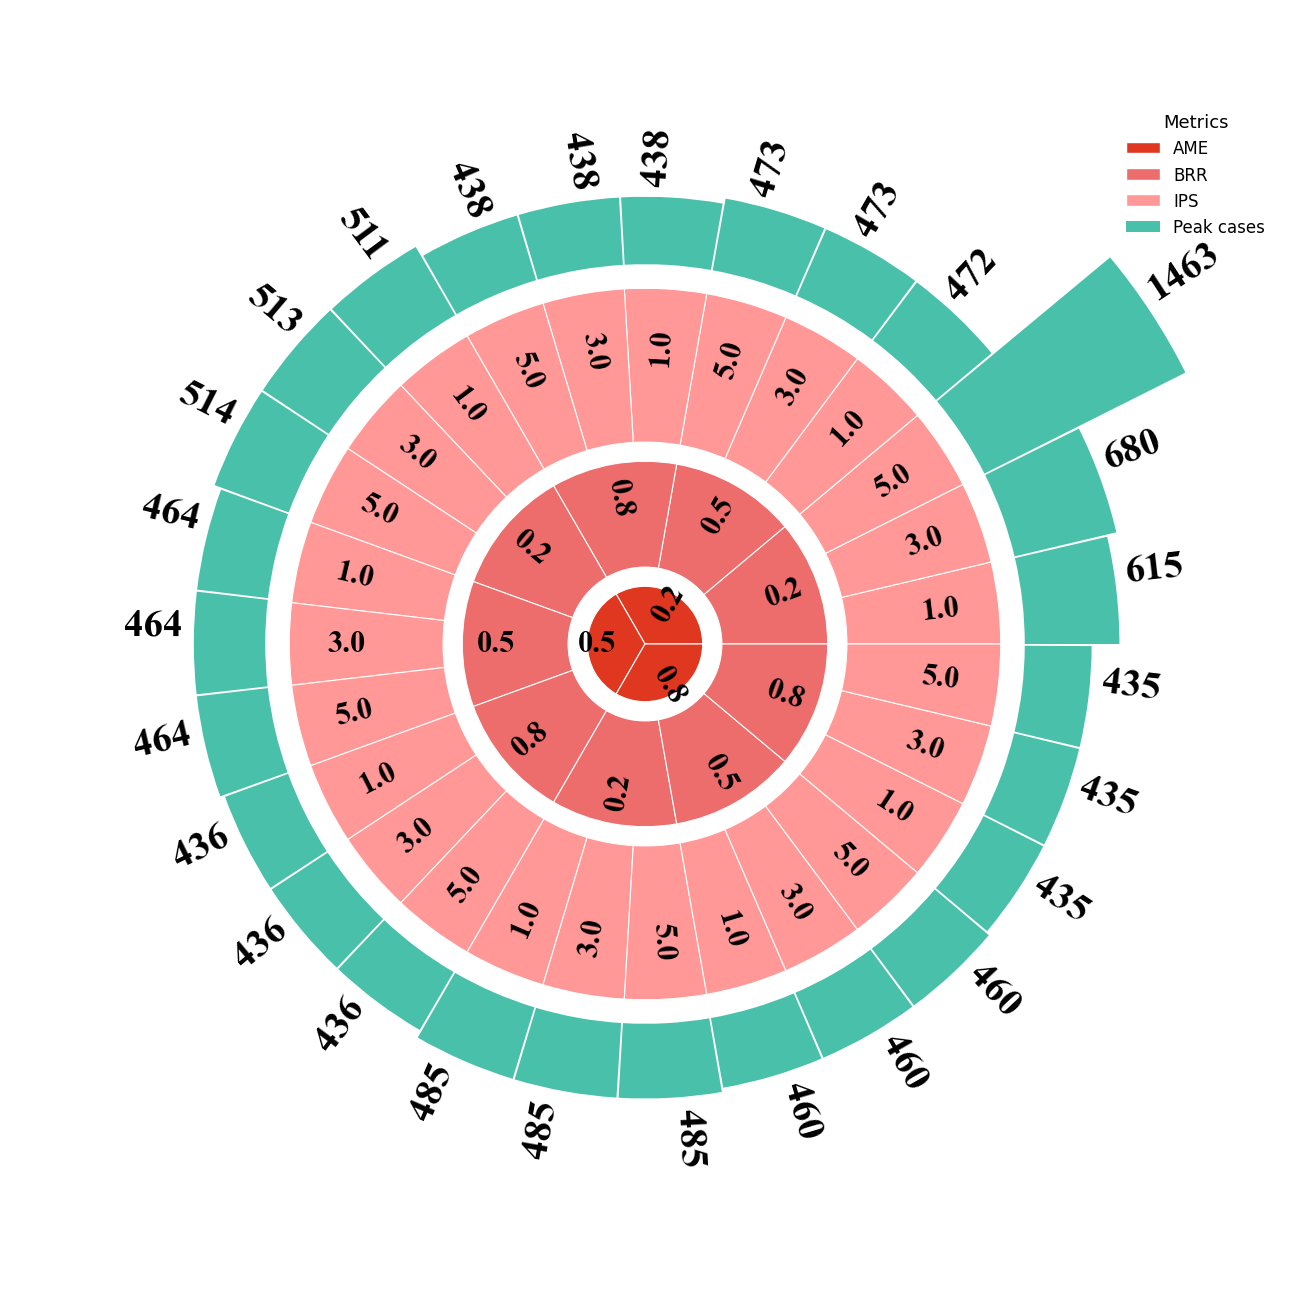

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import matplotlib as mpl 
import os

mpl.rcParams['pdf.fonttype'] = 42

# ---------- Uniform color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust the length according to n_inner, e.g., "#379684", "#D64D2B"

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")

excel_file_path = os.path.join(result_dir, "result_data_adult_R_bite_transmission_time_summary.xlsx")

df = pd.read_excel(excel_file_path)
df = df[['um_c', 'R_bite', 'transmission_time', 'peak_value']]
df.rename(columns={
        'um_c': 'AME',
        'R_bite': 'BRR',
        'transmission_time': 'IPS',
        'peak_value': 'Peak cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All columns except the last one are used as “rings”
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  
# n_rows is the number of rows in the data. 
# theta_rows gives each data point's angular position in the polar plot — 
# mathematically, these represent the starting angle of each segment, not the center.

# ---------- Ring thickness (increasing gradually; you can adjust the increment) ----------
base_thickness = 0.8      # Base thickness
incr = 0.5                # Increment per ring
gap_thickness = 0.2       # Gap thickness between rings, used to leave space for metric labels

# Optional adjustment example for the second-to-last ring:
# ring_thickness = [base_thickness + i*incr for i in range(n_inner - 1)]
# ring_thickness.append(ring_thickness[-1] - 1.5)

# Thickness for each of the n-1 inner rings
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]

actual_ring_thickness = [th - gap_thickness for th in ring_thickness]  # Actual thickness excluding gaps
# Bottom position of each ring = sum of all previous ring thicknesses + gaps
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]
total_inner_radius = sum(ring_thickness)  # Total radius of all rings combined

fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(13,13))  # Use polar coordinates

# Helper function: keep text upright for readability
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge consecutive identical values within the same ring) ----------
for j, col in enumerate(cols[:-1]):  # The last column is drawn as a radial bar
    values = np.array(df[col].values) 
    # Normalize values per column for color consistency
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))  
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Identify consecutive identical values (use np.isclose to avoid floating-point precision issues)
    # Initialize lists to store each unique value and its start index
    unique_vals = []
    starts = []
    prev = None
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))   # Ensure the last sector closes properly

    # Compute each sector’s angular width based on the number of consecutive identical values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add numeric labels at the center of each sector
        r_center = bottom + thickness/2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22, family='Times New Roman', weight='bold')

# ---------- Display metric names in the gaps between rings (one label per ring, or leave space for annotations later) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Place label at the top of the circle (can adjust to other angles, e.g., 0.5*np.pi)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)
    
# ---------- Outer ring: radial bar chart (represents the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6  
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi/n_rows * 0.98
theta_center = theta_rows + bar_width/2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03*total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner rings correspond to specific metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer ring (bar chart) legend
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to the figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=12, title_fontsize=13)

# ---------- Beautify the plot ----------
ax.set_yticklabels([])   # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove outer circular boundary
ax.set_xticks([])  # Hide angular ticks
ax.yaxis.grid(False)  # Hide radial grid lines
# ax.set_title("Eliminating adult mosquitoes & Reducing mosquito bite rates & Shortening transmission time", 
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig.S9 d.png"), format="png", dpi=450)
plt.show()


# result_data_aquatic_adult_R_bite_summary

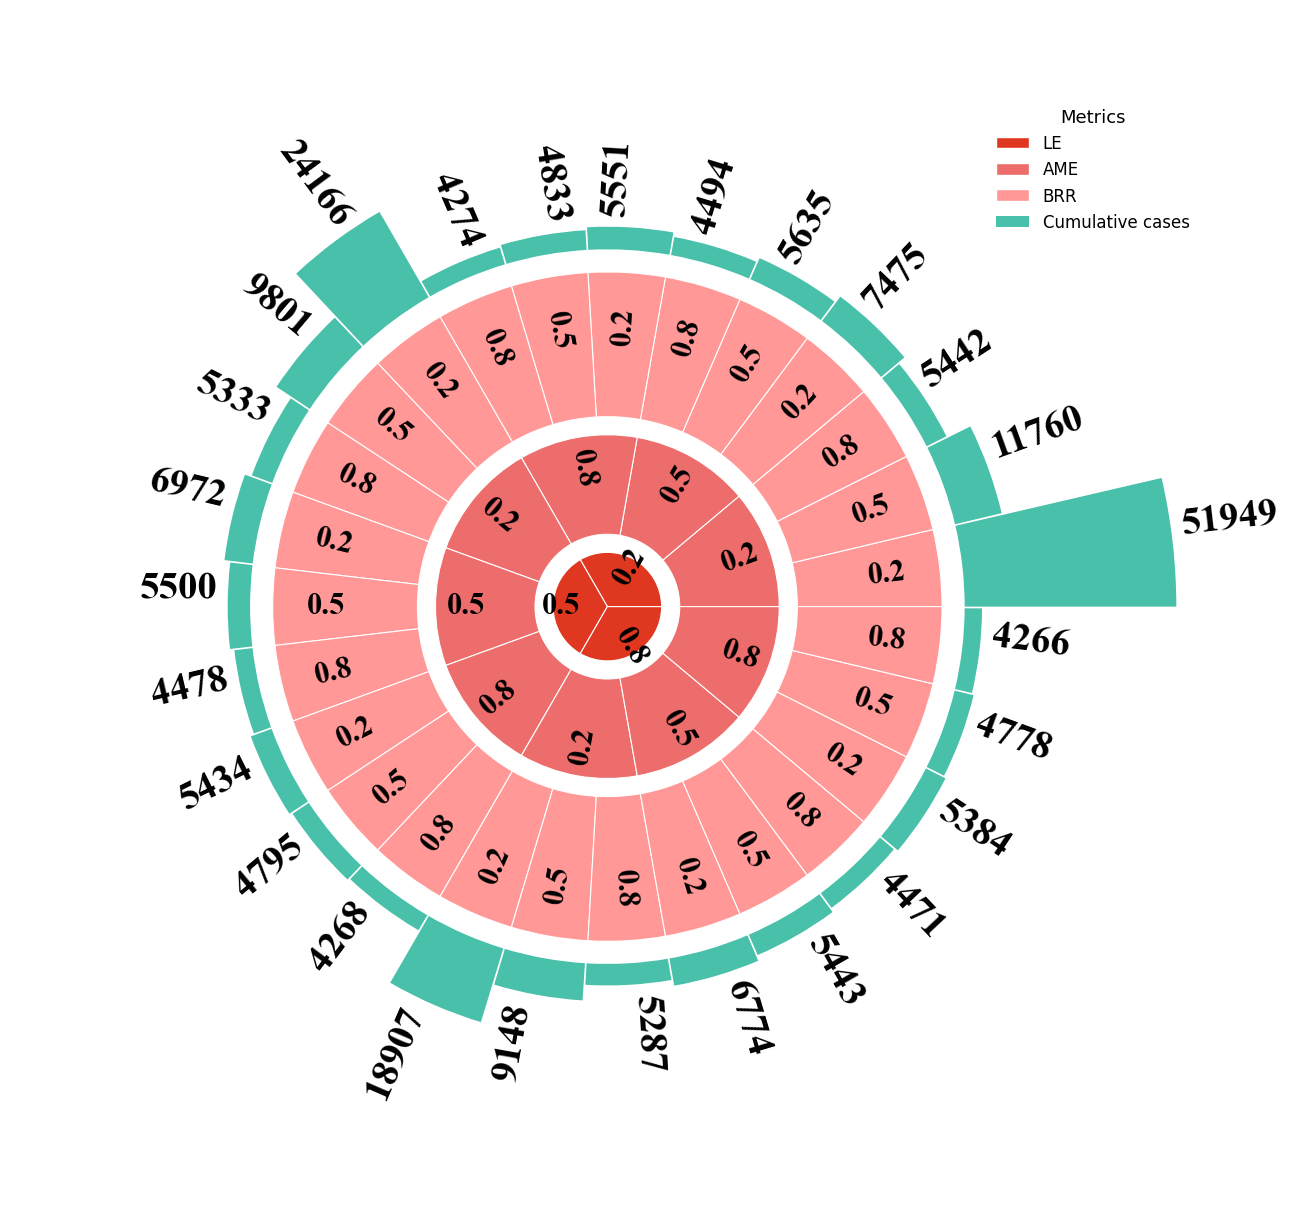

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import os
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42

# ---------- Unified color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust length according to n_inner

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")
excel_file_path = os.path.join(result_dir, "result_data_aquatic_adult_R_bite_summary.xlsx")

df = pd.read_excel(excel_file_path)
df = df[['ua_c', 'um_c', 'R_bite', 'total_cases_mid']]
df.rename(columns={
    'ua_c': 'LE',
    'um_c': 'AME',
    'R_bite': 'BRR',
    'total_cases_mid': 'Cumulative cases'
}, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All but the last column are drawn as “rings”

# Each row represents an angle position in the polar plot.
# theta_rows are the starting angles for each data segment (not center angles).
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)

# ---------- Ring thickness (increasing gradually) ----------
base_thickness = 0.8   # Base thickness
incr = 0.5             # Incremental increase per ring
gap_thickness = 0.2    # Gap thickness between rings, for label spacing

# Thickness for each of the first n-1 columns (rings)
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]

# Actual drawable thickness (excluding the gap)
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]

# Bottom position (inner radius) for each ring
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]

# Total inner radius (used for outer ring scaling)
total_inner_radius = sum(ring_thickness)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(13, 13))

# Helper: keep text readable (upright orientation)
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge consecutive identical values) ----------
for j, col in enumerate(cols[:-1]):  # The last column is for the bar layer
    values = np.array(df[col].values)
    # Normalize per layer for color consistency
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Detect consecutive identical values (using np.isclose for float tolerance)
    unique_vals = []
    starts = []
    prev = None
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))  # Close the final segment

    # Calculate angular width of each segment based on its length
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add value labels at segment centers
        r_center = bottom + thickness / 2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22,
                family='Times New Roman', weight='bold')

# ---------- Display ring labels (only once per ring, can later overlay in editing) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Position at the top of the circle (can change)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outermost ring: radial bar plot (for the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi / n_rows * 0.98
theta_center = theta_rows + bar_width / 2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

# Add value labels on top of bars
for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03 * total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor',
            fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner ring colors correspond to metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer ring bar color
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=12, title_fontsize=13)

# ---------- Beautify the figure ----------
ax.set_yticklabels([])               # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove the outermost circle
ax.set_xticks([])                    # Hide angular ticks
ax.yaxis.grid(False)                 # Hide circular grid lines
# ax.set_title("Eliminating larvae & Eliminating adult mosquitoes & Reducing mosquito bite rates",
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig.5 a.png"), format="png", dpi=450)
plt.show()


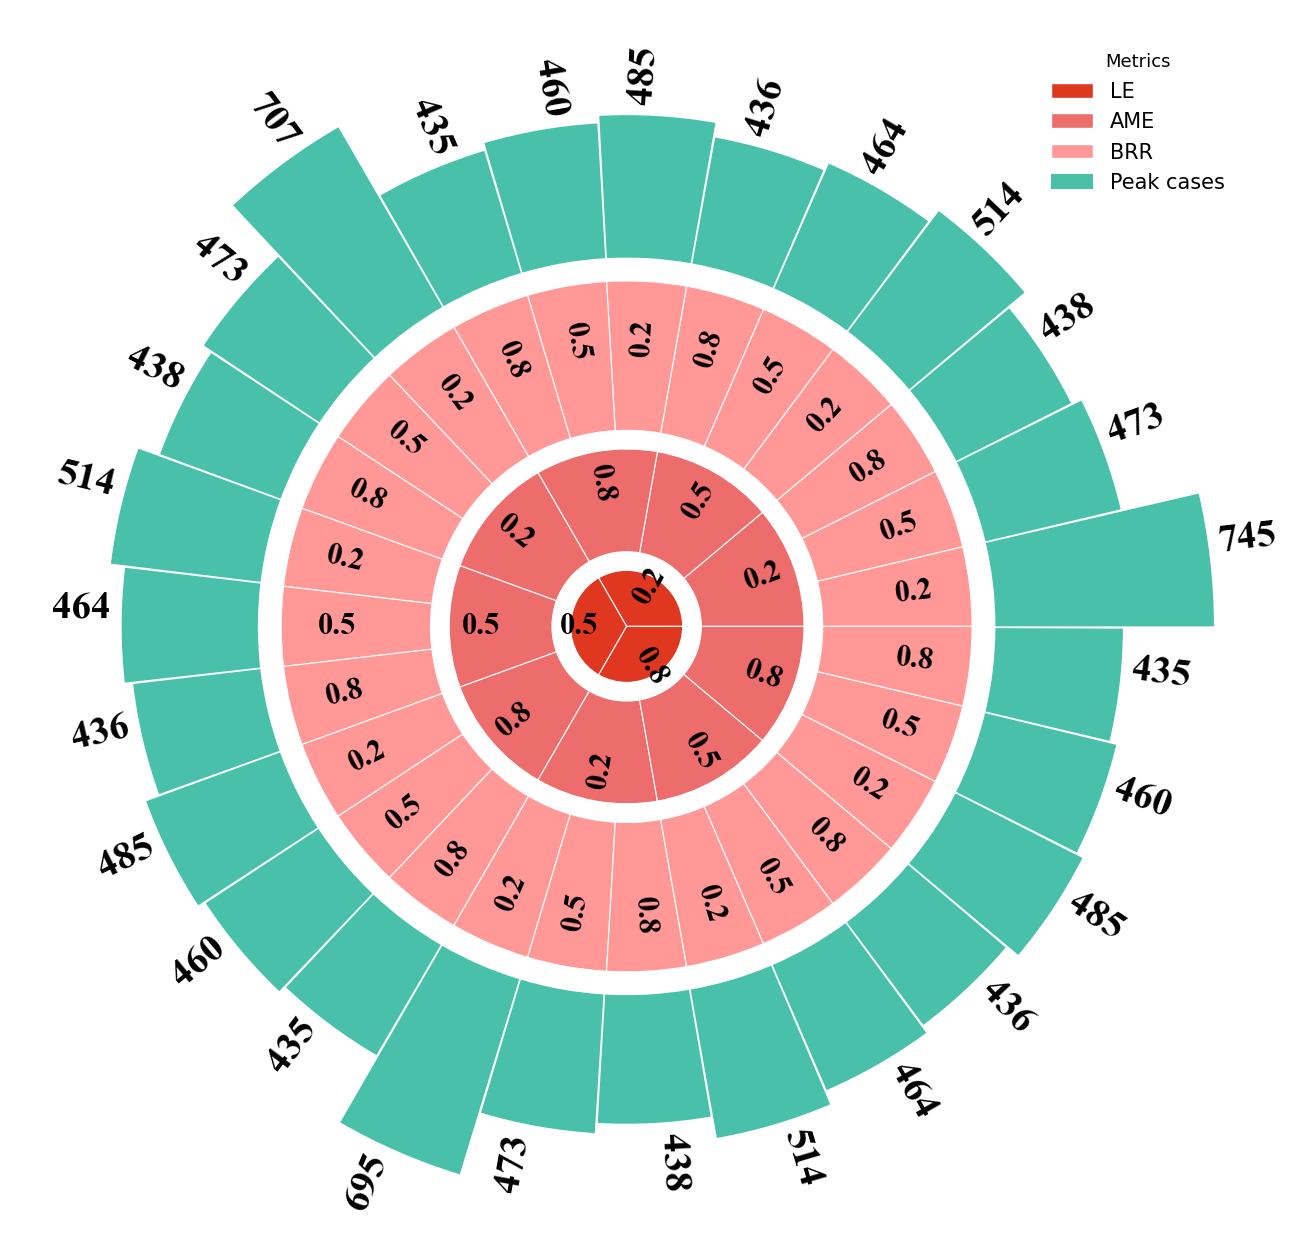

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import os
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42

# ---------- Unified color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust the length according to n_inner

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")
excel_file_path = os.path.join(result_dir, "result_data_aquatic_adult_R_bite_summary.xlsx")

df = pd.read_excel(excel_file_path)
df = df[['ua_c', 'um_c', 'R_bite', 'peak_value']]
df.rename(columns={
    'ua_c': 'LE',
    'um_c': 'AME',
    'R_bite': 'BRR',
    'peak_value': 'Peak cases'
}, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All but the last column are drawn as “rings”
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  # Each data row corresponds to an angle on the polar plot; theta_rows gives starting, not center, angles.

# ---------- Ring thickness (gradually increasing) ----------
base_thickness = 0.8   # Base thickness
incr = 0.5             # Incremental increase in thickness per ring
gap_thickness = 0.2    # Gap thickness between rings, used for label spacing

# You can also manually adjust one layer’s thickness for aesthetics if needed:
# ring_thickness = [base_thickness + i*incr for i in range(n_inner - 1)]
# ring_thickness.append(ring_thickness[-1] - 1.5)

# Thickness of the first n_inner rings
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]

# Actual drawable thickness (excluding the gap)
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]

# Bottom radius positions (starting point) for each ring
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]

# Total inner radius (used for scaling the outer bar layer)
total_inner_radius = sum(ring_thickness)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(13, 13))  # Use polar coordinates

# Helper: keep text upright and readable
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge consecutive identical values) ----------
for j, col in enumerate(cols[:-1]):  # The last column will be drawn as the outer bar layer
    values = np.array(df[col].values)
    # Normalize color mapping within each ring
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Find consecutive identical values (use np.isclose to avoid floating-point issues)
    unique_vals = []
    starts = []
    prev = None  # Store previous value for comparison
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):  # First value or changed segment
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))  # Close the last segment

    # Compute each segment’s angular width based on the count of identical values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k + 1]
        width = (end - start) / total_n * 2 * np.pi
        theta_center = (start + end) / 2 / total_n * 2 * np.pi  # Center angle for label
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add numeric labels at segment centers
        r_center = bottom + thickness / 2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22,
                family='Times New Roman', weight='bold')

# ---------- Label each ring (optional, only once per ring; mainly for spacing) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness / 2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Place at the top (can change to e.g. 0.5 * np.pi)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outermost ring: radial bar plot (represents the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2 * np.pi / n_rows * 0.98
theta_center = theta_rows + bar_width / 2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

# Add numeric labels above the bars
for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03 * total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor',
            fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner rings: color corresponds to metric
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer bar layer: use its own color
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.98),
          title='Metrics', frameon=False, fontsize=15, title_fontsize=13)

# ---------- Beautify the figure ----------
ax.set_yticklabels([])                 # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove outer circle border
ax.set_xticks([])                      # Hide angular ticks
ax.yaxis.grid(False)                   # Hide circular grid lines
# ax.set_title("Eliminating larvae & Eliminating adult mosquitoes & Reducing mosquito bite rates",
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig.S9 a.png"), format="png", dpi=450)
plt.show()


# result_data_aquatic_adult_transmission_time_summary

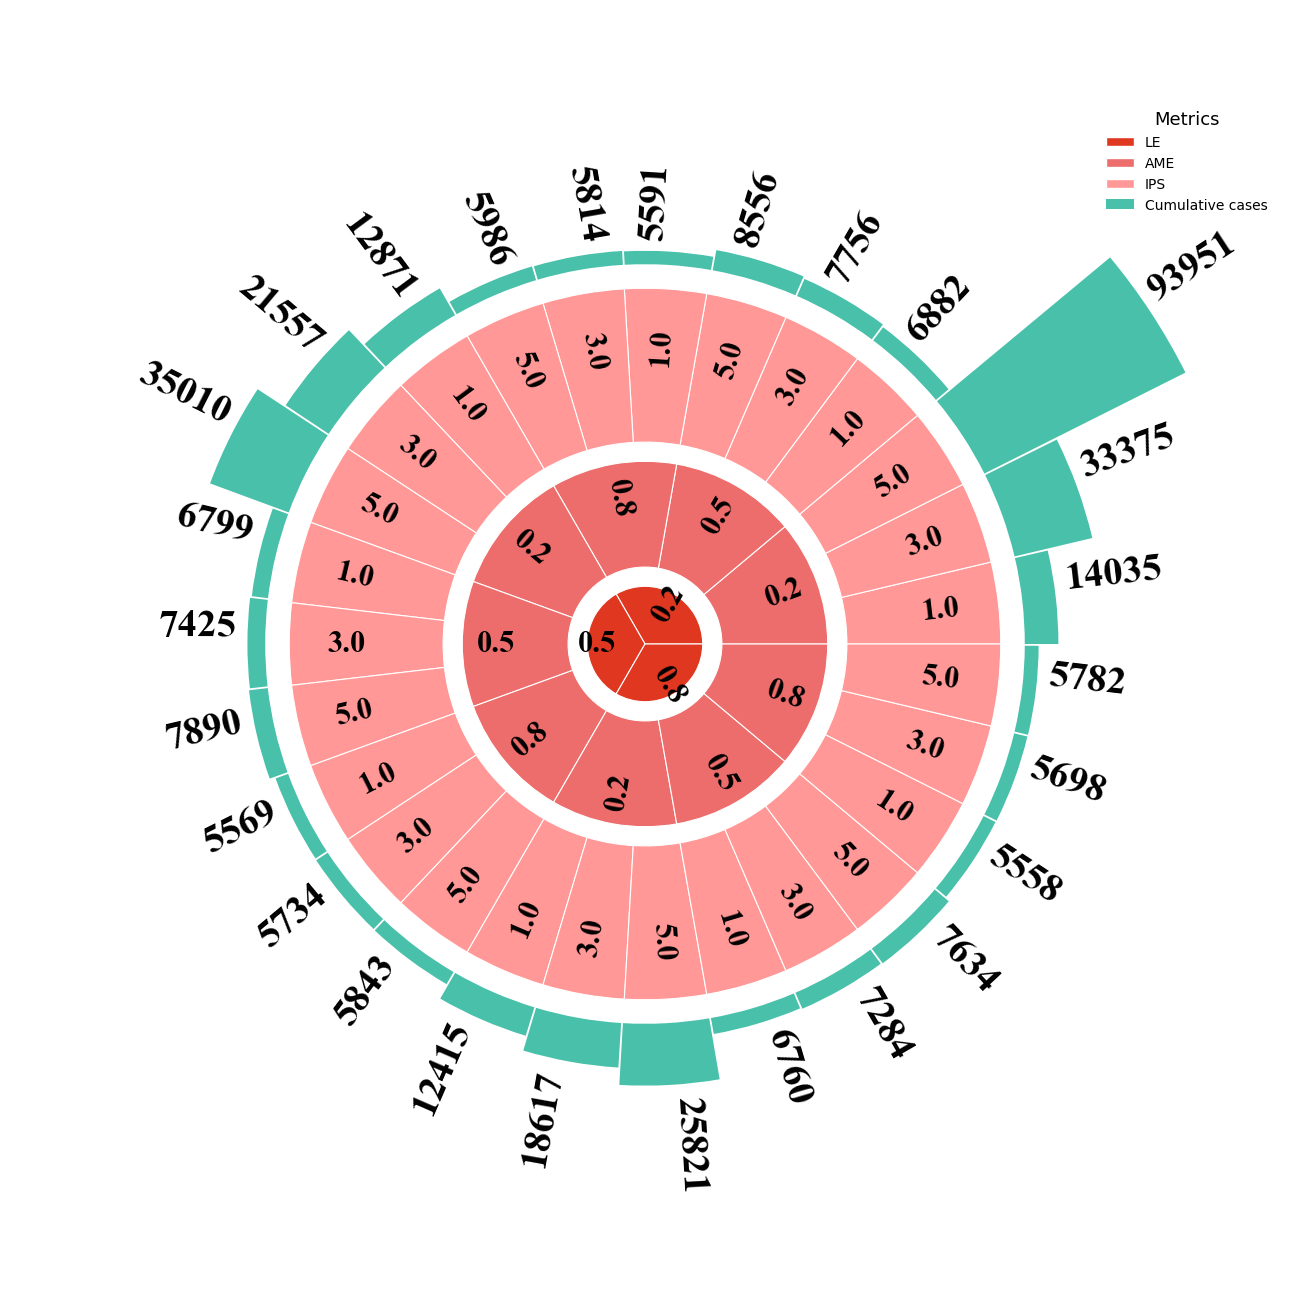

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

mpl.rcParams['pdf.fonttype'] = 42

# ---------- Unified color scheme for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust length according to n_inner, e.g., "#379684", "#D64D2B"

# =====================
# 1. Load data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")

excel_file_path = os.path.join(result_dir, "result_data_aquatic_adult_transmission_time_summary.xlsx")
df = pd.read_excel(excel_file_path)

df = df[['ua_c', 'um_c', 'transmission_time', 'total_cases_mid']]

df.rename(columns={
        'ua_c': 'LE',
        'um_c': 'AME',
        'transmission_time': 'IPS',
        'total_cases_mid': 'Cumulative cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All columns except the last one are rings
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  # Divide the circle evenly based on data rows

# ---------- Ring thickness (incrementally increasing, adjustable) ----------
base_thickness = 0.8  # Base ring thickness
incr = 0.5            # Incremental increase for each layer
gap_thickness = 0.2   # Gap between rings (used for metric labels)

# Thickness for each inner ring
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]

# Actual visible thickness (excluding gaps)
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]

# Starting radius for each ring
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]
total_inner_radius = sum(ring_thickness)  # Total inner radius of the diagram

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(13, 13))  # Use polar coordinate system

# Helper: keep text upright and readable
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge consecutive identical values in each ring) ----------
for j, col in enumerate(cols[:-1]):  # The last column is the outer bar chart
    values = np.array(df[col].values)
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))  # Normalize each ring for color mapping
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Identify segments with the same consecutive value (use np.isclose to avoid float precision issues)
    unique_vals = []
    starts = []
    prev = None
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=1e-4, rtol=0):
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))  # Ensure the last segment closes properly

    # Compute the angular width of each segment
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add text labels (values) at the center of each segment
        r_center = bottom + thickness / 2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22, family='Times New Roman', weight='bold')

# ---------- Display metric names in the gap between rings (once per ring) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness / 2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Position label at the top of the circle
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outer ring: radial bar chart (represents the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi / n_rows * 0.98
theta_center = theta_rows + bar_width / 2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

# Add labels on top of the bars
for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03 * total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner ring colors correspond to metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer ring bar legend
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to the figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=10, title_fontsize=13)

# ---------- Beautify the plot ----------
ax.set_yticklabels([])          # Remove radial axis labels
ax.spines['polar'].set_visible(False)  # Remove the outer circular frame
ax.set_xticks([])               # Remove angle ticks
ax.yaxis.grid(False)            # Hide radial grid lines
# ax.set_title("Eliminating larvae & Eliminating adult mosquitoes & Shortening transmission time",
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig.5 b.png"), format="png", dpi=450)
plt.show()


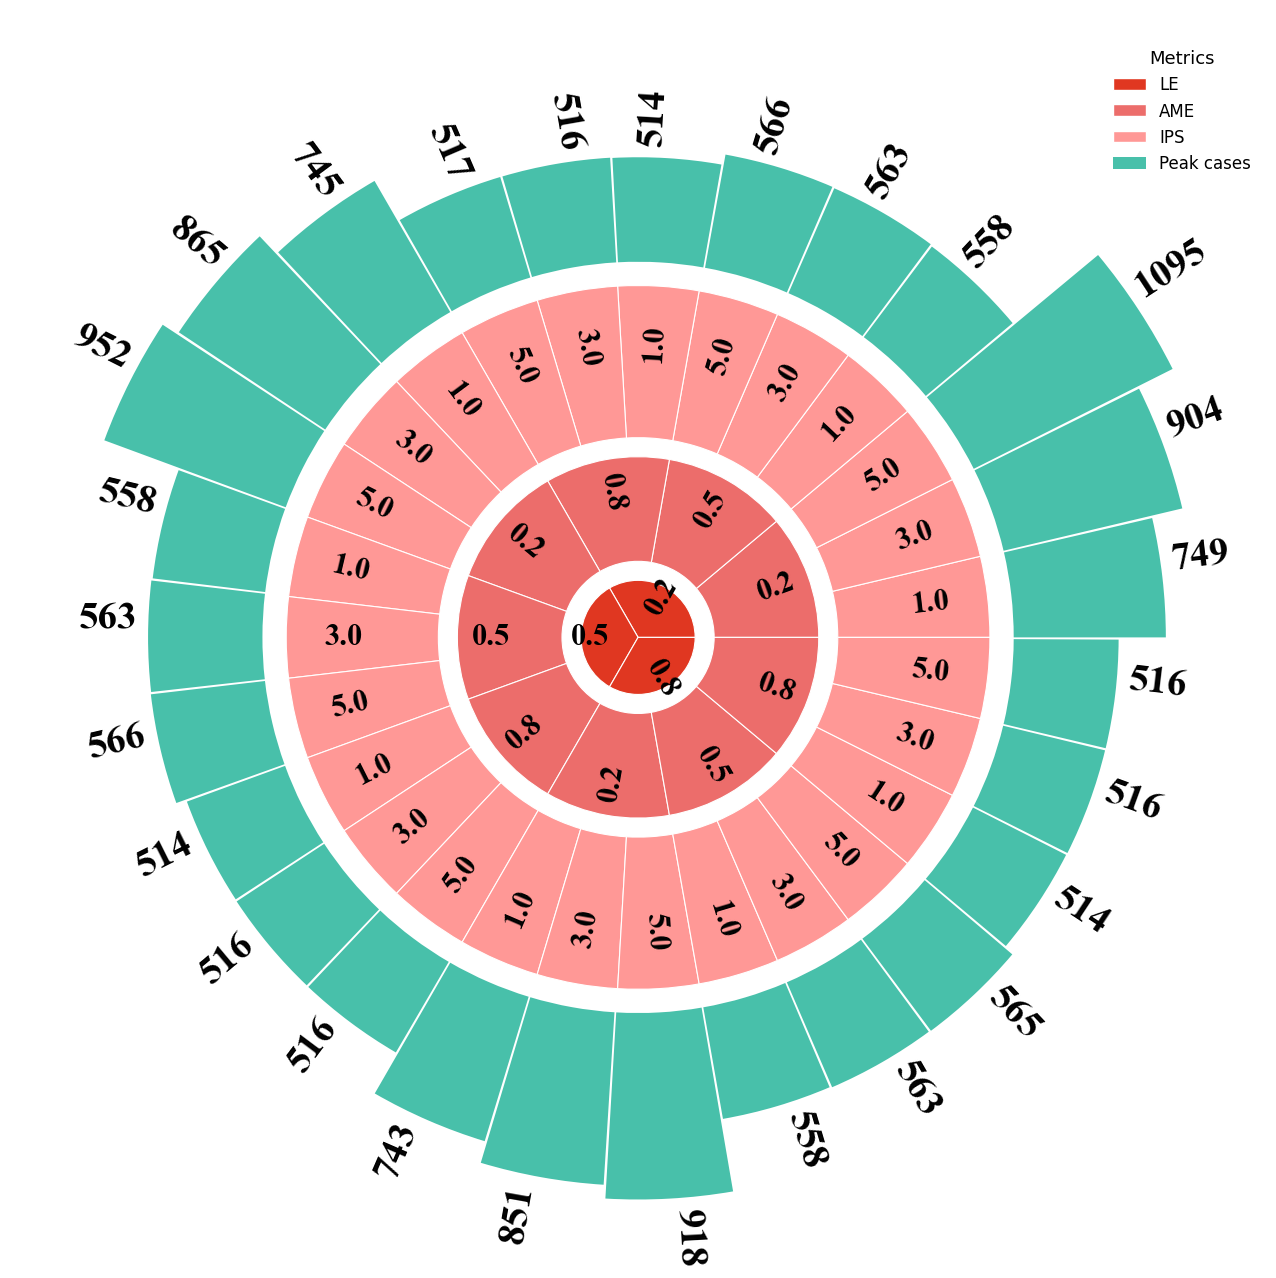

In [6]:
mpl.rcParams['pdf.fonttype'] = 42
# ---------- Unified color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust the length according to n_inner, e.g. "#379684", "#D64D2B"

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")
excel_file_path = os.path.join(result_dir, "result_data_aquatic_adult_transmission_time_summary.xlsx")

df = pd.read_excel(excel_file_path)

df = df[['ua_c', 'um_c', 'transmission_time', 'peak_value']]

df.rename(columns={
        'ua_c': 'LE',
        'um_c': 'AME',
        'transmission_time': 'IPS',
        'peak_value': 'Peak cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All columns except the last one are drawn as “rings”
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  # Each data point’s angular position on the polar plot

# ---------- Ring thickness (gradually increasing), can adjust increment ----------
base_thickness = 0.8  # Base thickness
incr = 0.5  # Increment per ring
gap_thickness = 0.2  # Gap thickness between rings (for label spacing)

# Thickness for the first n-1 rings
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]  

# Actual thickness after removing gaps
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]

# Bottom position of each ring
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]

# Total inner radius of all rings
total_inner_radius = sum(ring_thickness)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(13, 13))  # Use polar coordinate system

# Helper: keep text upright for readability
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge continuous identical values within each ring) ----------
for j, col in enumerate(cols[:-1]):  # The last column is the bar chart
    values = np.array(df[col].values)
    # Normalize colors for each ring independently
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Find contiguous identical values (using np.isclose to avoid floating-point issues)
    unique_vals = []
    starts = []
    prev = None
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))  # Ensure the last segment closes

    # Compute each sector width based on the number of identical values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Label value at the sector center
        r_center = bottom + thickness/2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22, family='Times New Roman', weight='bold')

# ---------- Display ring metric labels in the gaps (one per ring) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Placed at the top of the circle (can change to 0.5*np.pi)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outer ring: radial bar chart (for the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi/n_rows * 0.98
theta_center = theta_rows + bar_width/2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03*total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner ring colors correspond to metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer bar chart legend (same color as bar)
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.98),
          title='Metrics', frameon=False, fontsize=12, title_fontsize=13)

# ---------- Beautify plot ----------
ax.set_yticklabels([])   # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove outermost circle
ax.set_xticks([])  # Hide angular ticks
ax.yaxis.grid(False)  # Hide ring gridlines
# ax.set_title("Eliminating larvae & Eliminating adult mosquitoes & Shortening transmission time",
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig. S9 b.png"), format="png", dpi=450)
plt.show()


# result_data_aquatic_R_bite_transmission_time_summary

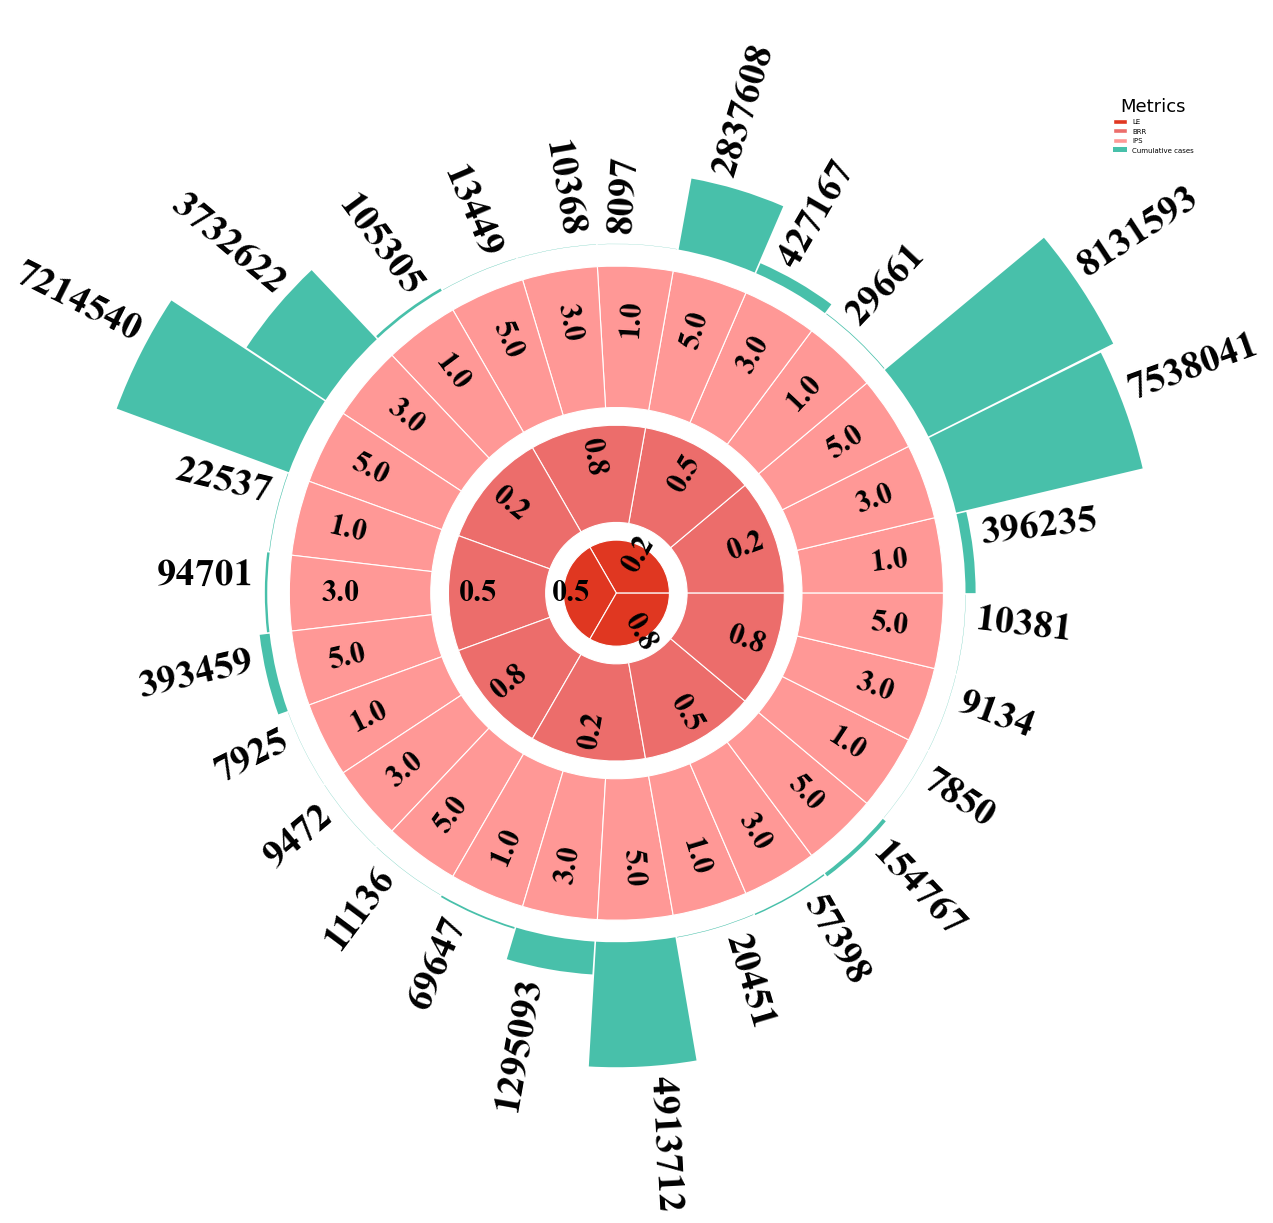

In [7]:
mpl.rcParams['pdf.fonttype'] = 42
# ---------- Unified color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust length according to n_inner, e.g. "#379684", "#D64D2B"

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")
excel_file_path = os.path.join(result_dir, "result_data_aquatic_R_bite_transmission_time_summary.xlsx")

df = pd.read_excel(excel_file_path)

df = df[['ua_c', 'R_bite', 'transmission_time', 'total_cases_mid']]

df.rename(columns={
        'ua_c': 'LE',
        'R_bite': 'BRR',
        'transmission_time': 'IPS',
        'total_cases_mid': 'Cumulative cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All columns except the last one are drawn as “rings”
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  # n_rows is the number of data points; theta_rows gives the angular position of each on the polar plot (start angle, not center angle)

# ---------- Ring thickness (gradually increasing), adjustable increment ----------
base_thickness = 0.8  # Base thickness
incr = 0.5  # Increment per ring
gap_thickness = 0.2  # Gap thickness between rings, used for displaying indicator labels

# Optional manual adjustment of the penultimate layer’s thickness
# ring_thickness = [base_thickness + i*incr for i in range(n_inner - 1)]  # Thickness for first n_inner - 1 rings
# ring_thickness.append(ring_thickness[-1] - 1.5)  # Special adjustment for aesthetics

# Thickness of each ring (first n-1 columns)
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]

actual_ring_thickness = [th - gap_thickness for th in ring_thickness]  # Actual sector thickness
# Bottom position = sum of previous ring thickness + gap
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]  # Starting radius of each ring
total_inner_radius = sum(ring_thickness)  # Total thickness of all rings

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(13, 13))  # Use polar coordinate system

# Helper: keep text upright for readability
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge consecutive identical values within each ring) ----------
for j, col in enumerate(cols[:-1]):  # The last column is the outer bar chart
    values = np.array(df[col].values)
    # Normalize color per column
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))  # Each ring normalized separately for color mapping
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Find consecutive identical values (use np.isclose to avoid floating-point errors)
    unique_vals = []
    starts = []
    prev = None  # Store previous value for comparison
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):  # If first value or value differs from previous
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))   # Ensure the last segment closes properly

    # Compute each sector’s width based on number of identical consecutive values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]  # Get start and end index for this value
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi  # Compute sector’s center angle
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Add value label at sector center
        r_center = bottom + thickness/2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22, family='Times New Roman', weight='bold')

# ---------- Show indicator names in the gaps (one per ring; reserved space for labels) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Place at top of circle (can change to another angle, e.g. 0.5*np.pi)
    rot, ha = text_rotation_deg(theta_label)
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outer ring: radial bar chart (represents the last column) ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
if outer_vals.max() > 0:
    scale = max_bar_len / outer_vals.max()
else:
    scale = 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi/n_rows * 0.98
theta_center = theta_rows + bar_width/2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03*total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28, family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner ring colors correspond to metrics
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer bar chart legend (same color as outer ring)
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to the figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=5, title_fontsize=13)

# ---------- Beautify the figure ----------
ax.set_yticklabels([])   # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Remove the outermost circle
ax.set_xticks([])  # Hide angular ticks
ax.yaxis.grid(False)  # Hide circular gridlines
# ax.set_title("Eliminating larvae & Reducing mosquito bite rates & Shortening transmission time", 
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig. 5 c.png"), format="png", dpi=450)
plt.show()


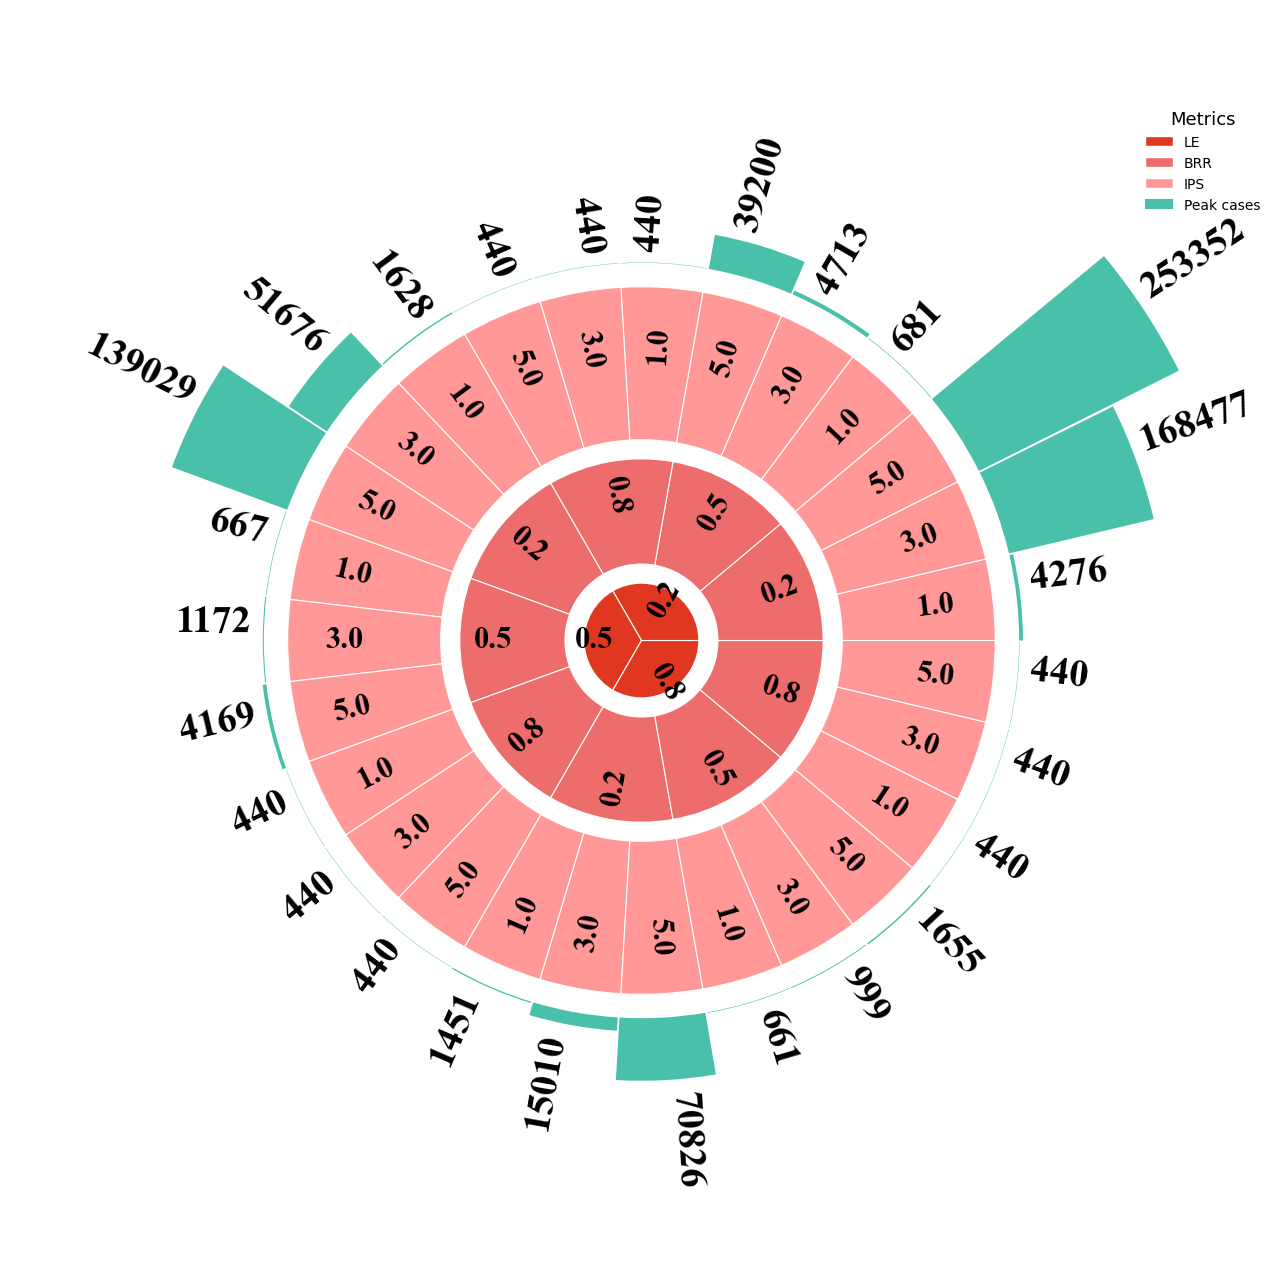

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
# ---------- Unified color for each ring ----------
ring_colors = ["#E03721", "#EC6D6B", "#FF9896", "#48C0AA"]  # Adjust length according to n_inner

# =====================
# 1. Read data
# =====================

current_script_path = os.getcwd()
parent_dir = os.path.dirname(current_script_path)
result_dir = os.path.join(parent_dir, "3.result")

excel_file_path = os.path.join(result_dir, "result_data_aquatic_R_bite_transmission_time_summary.xlsx")
df = pd.read_excel(excel_file_path)

df = df[['ua_c', 'R_bite', 'transmission_time', 'peak_value']]

df.rename(columns={
        'ua_c': 'LE',
        'R_bite': 'BRR',
        'transmission_time': 'IPS',
        'peak_value': 'Peak cases'
    }, inplace=True)

cols = list(df.columns)
n_rows = len(df)
n_inner = len(cols) - 1   # All but the last column are "rings"
theta_rows = np.linspace(0, 2*np.pi, n_rows, endpoint=False)  # Angular position for each data row

# ---------- Ring thickness settings (increasing gradually) ----------
base_thickness = 0.8      # Base thickness
incr = 0.5                # Increment per ring
gap_thickness = 0.2       # Gap thickness between rings (used to display variable names)

# Thickness of each ring (except the gap)
ring_thickness = [base_thickness + i*incr for i in range(n_inner)]
actual_ring_thickness = [th - gap_thickness for th in ring_thickness]  # Actual bar thickness
# Bottom position of each ring
bottoms = [sum(actual_ring_thickness[:i]) + i*gap_thickness for i in range(n_inner)]
total_inner_radius = sum(ring_thickness)  # Total thickness (for scaling the outer ring)

fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(13,13))  # Polar coordinate plot

# Helper: keep text upright and readable
def text_rotation_deg(angle_rad):
    deg = np.degrees(angle_rad) % 360
    if 90 < deg < 270:
        return deg + 180, 'right'
    else:
        return deg, 'left'

# ---------- Draw inner rings (merge adjacent sectors with the same value) ----------
for j, col in enumerate(cols[:-1]):  # The last column is for the outer bar
    values = np.array(df[col].values)
    # Normalize each ring's values separately for color mapping
    norm = colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
    thickness = actual_ring_thickness[j]
    bottom = bottoms[j]

    # Find contiguous identical values (use np.isclose to avoid floating-point issues)
    unique_vals = []
    starts = []
    prev = None
    for i, v in enumerate(values):
        if prev is None or not np.isclose(v, prev, atol=10**(-4), rtol=0):
            unique_vals.append(v)
            starts.append(i)
            prev = v
    starts.append(len(values))  # Close the last sector

    # Compute sector width based on consecutive identical values
    total_n = len(values)
    for k, v in enumerate(unique_vals):
        start = starts[k]
        end = starts[k+1]
        width = (end - start) / total_n * 2*np.pi
        theta_center = (start + end) / 2 / total_n * 2*np.pi
        ax.bar(theta_center, thickness, width=width, bottom=bottom,
               color=ring_colors[j], edgecolor='white', linewidth=0.8)

        # Label each sector with its value
        r_center = bottom + thickness/2
        rot, ha = text_rotation_deg(theta_center)
        label = f"{v:.1f}"
        ax.text(theta_center, r_center, label, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=22,
                family='Times New Roman', weight='bold')

# ---------- Leave gap between rings to display indicator names (only one per ring) ----------
label_radius = [bottoms[i] + actual_ring_thickness[i] + gap_thickness/2 for i in range(n_inner)]
for j, col in enumerate(cols[:-1]):
    theta_label = np.pi  # Placed at the top of the circle (change if desired)
    rot, ha = text_rotation_deg(theta_label)
    # Uncomment if you want to show variable names:
    # ax.text(theta_label, label_radius[j], col, rotation=rot, ha=ha, va='center',
    #         fontsize=12, family='Times New Roman', weight='bold', alpha=0.8)

# ---------- Outermost ring: radial bars representing the last column ----------
outer_vals = np.array(df[cols[-1]].values, dtype=float)
max_bar_len = total_inner_radius * 0.6
scale = max_bar_len / outer_vals.max() if outer_vals.max() > 0 else 1.0
bar_heights = outer_vals * scale

bar_bottom = total_inner_radius + 0.05
bar_width = 2*np.pi/n_rows * 0.98
theta_center = theta_rows + bar_width/2

bars = ax.bar(theta_center, bar_heights, width=bar_width, bottom=bar_bottom,
              color=ring_colors[-1], edgecolor='None', linewidth=0.6)

for th, h, val in zip(theta_center, bar_heights, outer_vals):
    rot, ha = text_rotation_deg(th)
    ax.text(th, bar_bottom + h + 0.03*total_inner_radius,
            f"{round(val)}", ha=ha, va='bottom',
            rotation=rot, rotation_mode='anchor', fontsize=28,
            family='Times New Roman', weight='bold')

# ---------- Add legend ----------
legend_elements = []

# Inner ring colors correspond to indicators
for i in range(n_inner):
    legend_elements.append(Patch(facecolor=ring_colors[i], edgecolor='white', label=cols[i]))

# Outer ring (bar) legend
legend_elements.append(Patch(facecolor=ring_colors[-1], edgecolor='None', label=cols[-1]))

# Add legend to the figure
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.93),
          title='Metrics', frameon=False, fontsize=10, title_fontsize=13)

# ---------- Beautify the figure ----------
ax.set_yticklabels([])   # Remove radial tick labels
ax.spines['polar'].set_visible(False)  # Hide outer circle
ax.set_xticks([])  # Remove angular ticks
ax.yaxis.grid(False)  # Hide circular gridlines
# ax.set_title("Eliminating larvae & Reducing mosquito bite rates & Shortening transmission time",
#              fontsize=15, family='Times New Roman', weight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(result_dir, "plot fig/Fig. S9 c.png"), format="png", dpi=450)
plt.show()
